In [2]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.linear_model import LinearRegression

[x for x in dir(list) if not '__' in x]


['append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

For the remainder of the semester our group will be working with a FIFA 18 COMPLETE PLAYER DATASET, that can be found on kaggle.com. The size of this dataset is approximately 17981 x 75, which includes features that range from the players name to their individual agility in the game. The dataset provides the positions played by the individual as well as their current salary from their respective club. It is also important to note that the players age and club is represented in the data. There are a few features within this dataset that we do not specifically need in order to answer our question such as their photo and team flag, which we have programmed to remove. With the time that we have worked with this dataset we realized that majority of the features are strings and need to be converted into an integer because there are some values represented as objects and we cannot use them. Along with missing data and attributes that include symbols that we will remove. Removing these feature will not specifically remove the player as a whole but just that specific attribute.This data is important to help develop the game and advance the sport of soccer. It would also be important to anyone who is responsible for paying the players because they would want to make sure they don’t overpay or miss out on a once in a lifetime player. These attributes give value to each specific player. There is a lot of importance when it comes to the success of the club as well because without good players the team won’t win. We think that this data could also be important to determine the longevity of a players career and determine if the player is really deserving of a large contract or that the club should pass on the player and select a younger player for their roster.
Working with this data set we are able to ask a few questions such as:
 What attributes have the most significance when it comes to a players salary?
Can we predict the players salary based on their position?
Relating specific attributes to an individual players salary. 
Given the players rating of … can their salary be determined?
Do certain positions pay more compared to others?	
Do certain teams pay more compared to others?
Can we predict a players’ position based on their ability rankings?
We think that initially we are going to look at our data set and try to analyze our problem as a regression type. We have discussed the ability to switch to a categorical question later on because we have a lot of data points and attributes that we could use. 


In [3]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)


In [4]:
fifa.head(10)




,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,79,80,...,83,88,19,83,79,42,84,78,87,ST
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,57,38,...,50,31,13,58,40,21,64,68,13,GK
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,93,54,...,86,79,22,87,79,27,65,86,79,LW
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,60,60,...,90,87,69,52,77,82,74,88,82,CDM CM
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,78,50,...,75,88,18,80,72,22,85,70,88,ST


In [5]:
for k in fifa.index: 
    fifa.loc[k, 'Value'] = float(fifa.loc[k, 'Value'][1:-1])


ValueError: could not convert string to float: 

In [8]:
set(fifa.loc[:,'Value'])

{4.5,
 5.0,
 9.0,
 10.5,
 11.0,
 '€8M',
 13.5,
 '€700K',
 '€350K',
 '€3M',
 '€10K',
 18.5,
 '€22.5M',
 20.0,
 21.0,
 22.5,
 22.0,
 24.5,
 25.5,
 26.0,
 26.5,
 27.5,
 28.0,
 25.0,
 31.0,
 31.5,
 27.0,
 28.5,
 29.0,
 29.5,
 30.0,
 30.5,
 33.0,
 34.0,
 34.5,
 36.0,
 37.5,
 38.0,
 39.0,
 40.0,
 40.5,
 42.5,
 43.0,
 44.0,
 44.5,
 45.0,
 47.5,
 48.0,
 48.5,
 51.5,
 52.0,
 52.5,
 56.0,
 57.0,
 56.5,
 59.0,
 60.0,
 61.0,
 64.5,
 65.0,
 66.5,
 67.5,
 69.5,
 70.5,
 '€29M',
 '€7.5M',
 '€750K',
 75.0,
 '€5M',
 77.0,
 '€450K',
 79.0,
 83.0,
 90.5,
 92.0,
 '€17M',
 95.5,
 97.0,
 '€1.2M',
 '€230K',
 '€875K',
 '€3.6M',
 '€4.6M',
 '€975K',
 105.0,
 '€4.1M',
 '€1.7M',
 '€925K',
 23.0,
 24.0,
 123.0,
 '€270K',
 '€3.3M',
 '€600K',
 '€100K',
 '€200K',
 '€25M',
 '€0',
 '€9M',
 '€575K',
 32.0,
 32.5,
 '€16.5M',
 '€27M',
 '€13M',
 '€24.5M',
 '€650K',
 '€550K',
 35.5,
 35.0,
 '€375K',
 '€15M',
 '€1.1M',
 37.0,
 '€1M',
 '€4.7M',
 '€23.5M',
 38.5,
 '€30M',
 '€16M',
 39.5,
 '€2.5M',
 '€1.8M',
 '€170K',
 '€800K',


In [6]:
fifa.loc[250:, 'Age'].head(10)

250    26
251    26
252    29
253    29
254    28
255    26
256    26
257    27
258    27
259    27
Name: Age, dtype: int64

In [12]:
regex = r'^(\d{2})'

y = np.array(fifa.loc[:, 'Age'])
z = np.array(fifa.loc[:, 'Age'])

fifa['Age'] = pa.to_numeric(y)
fifa['Acceleration'] = pa.to_numeric(z)

In [49]:
# Creates float values for column in whatever

X = np.atleast_2d(np.array([float(h) for h in fifa.loc[:, 'Age']])).transpose()

# Recall that we need an array of shape (n, 1) and so there are some numpy.array manipulations needed
Y = np.atleast_2d(np.array([float(h) for h in fifa.loc[:, 'Overall']])).transpose()


Z = np.atleast_2d(np.array([float(h) for h in fifa.loc[:, 'Acceleration']])).transpose()


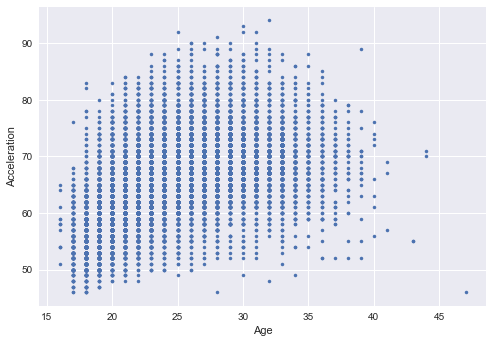

In [50]:
plt.plot(X, Y,'.')
plt.ylabel('Acceleration')
plt.xlabel('Age')
plt.show()


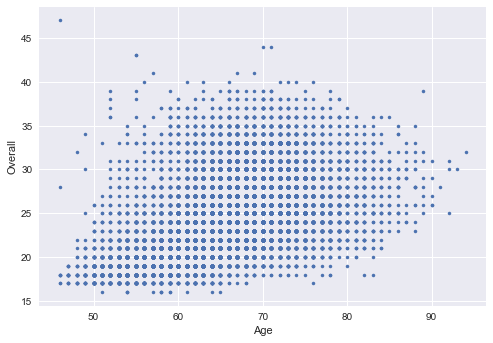

In [51]:
plt.plot(Y,Z,'.')
plt.ylabel('Overall')
plt.xlabel('Age')
plt.show()

In [33]:
#This should drop all rows containing + from the column aggression
fifa = fifa[~fifa['Aggression'].isin(['+'])]

In [54]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [55]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
b, m

(array([ 65.92138701]), array([ 0.01456483]))

In [9]:
plt.plot(X_train, y_train, 'b.')
plt.plot(X_test, y_test, 'b+')
xx = np.linspace(0, 0.8, 50)
yy = b + m*xx
plt.plot(xx, yy, 'r-');

NameError: name 'X_train' is not defined

In [57]:
X2 = np.atleast_2d(np.array([x**2 for x in X]))
X = np.concatenate([X, X2], axis=1)

In [58]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [59]:
reg = LinearRegression().fit(X_train, y_train)

In [60]:
c, b, a = reg.intercept_, *reg.coef_
c, b, a

ValueError: not enough values to unpack (expected 3, got 2)

In [61]:
plt.plot(X_train[:, 0], y_train, 'b.')
plt.plot(X_test[:, 0], y_test, 'b+')
xx = np.linspace(0, 0.8, 50)
yy = a*xx**2 + b*xx + c
plt.plot(xx, yy, 'r-');

In [62]:
sn.pairplot(fifa)
plt.savefig('11.10.png')